In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



%matplotlib inline 


In [18]:
mortality = pd.read_csv("data/mortality.csv")
incidence = pd.read_csv("data/incidence.csv")
screening = pd.read_csv("data/screening_risk.csv")
state_mortality=pd.read_csv("data/state_mortality.csv")

In [4]:
mortality.head()

,Notes,Year,Year Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,1999.0,1999.0,41144,142237295,28.9,26.6
1,NaN,2000.0,2000.0,41872,143368343,29.2,26.8
2,NaN,2001.0,2001.0,41394,145077463,28.5,26.1
3,NaN,2002.0,2002.0,41514,146394634,28.4,25.7
4,NaN,2003.0,2003.0,41620,147679036,28.2,25.3


In [5]:
incidence.head()

,Notes,Year,Year Code,Age Groups,Age Groups Code,Count
0,NaN,1999,1999,15-19 years,15-19,17
1,NaN,1999,1999,20-24 years,20-24,121
2,NaN,1999,1999,25-29 years,25-29,781
3,NaN,1999,1999,30-34 years,30-34,2788
4,NaN,1999,1999,35-39 years,35-39,7064


In [19]:
screening.head()

,State,FIPS,Percent(2),Lower 95% Confidence Interval,Upper 95% Confidence Interval,Number of Respondents with Screening or Risk Factor
0,United States,0,70.2,NaN,NaN,NaN
1,Wyoming,56000,59.5,56.7,62.3,1068.0
2,New Mexico,35000,62.0,58.9,65.0,1305.0
3,Idaho,16000,62.1,59.8,64.5,1431.0
4,Alaska,2900,62.5,59.5,65.5,1206.0


In [20]:
state_mortality.head()

,Notes,State,State Code,Deaths,Population,Age-Adjusted Rate
0,NaN,Alabama,1.0,15819.0,56226224.0,23.1
1,NaN,Alaska,2.0,1356.0,7674965.0,20.5
2,NaN,Arizona,4.0,17628.0,72233883.0,20.6
3,NaN,Arkansas,5.0,9327.0,33628106.0,22.4
4,NaN,California,6.0,99467.0,428484318.0,21.3


In [23]:

screening = screening.rename(columns={"Percent(2)": "ScreeningRate"})


state_mortality= state_mortality.rename(columns={
    "Age-Adjusted Rate": "MortalityRate"
})


In [24]:
merged= pd.merge(screening, state_mortality, on="State", how="inner")
merged.head()


,State,FIPS,ScreeningRate,Lower 95% Confidence Interval,Upper 95% Confidence Interval,Number of Respondents with Screening or Risk Factor,Notes,State Code,Deaths,Population,MortalityRate
0,Wyoming,56000,59.5,56.7,62.3,1068.0,NaN,56.0,1486.0,6175257.0,20.7
1,New Mexico,35000,62.0,58.9,65.0,1305.0,NaN,35.0,5680.0,23331007.0,20.8
2,Idaho,16000,62.1,59.8,64.5,1431.0,NaN,16.0,4251.0,17892300.0,21.4
3,Alaska,2900,62.5,59.5,65.5,1206.0,NaN,2.0,1356.0,7674965.0,20.5
4,Nevada,32000,62.7,58.3,67.0,742.0,NaN,32.0,7518.0,29896674.0,23.1


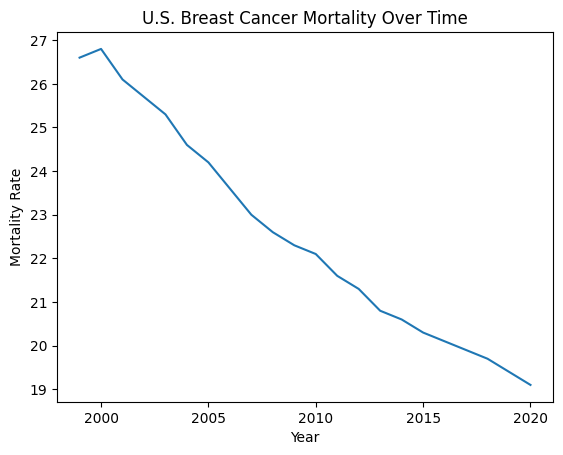

In [30]:
plt.plot(mortality["Year"], mortality["Age Adjusted Rate"])

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("U.S. Breast Cancer Mortality Over Time")

plt.show()


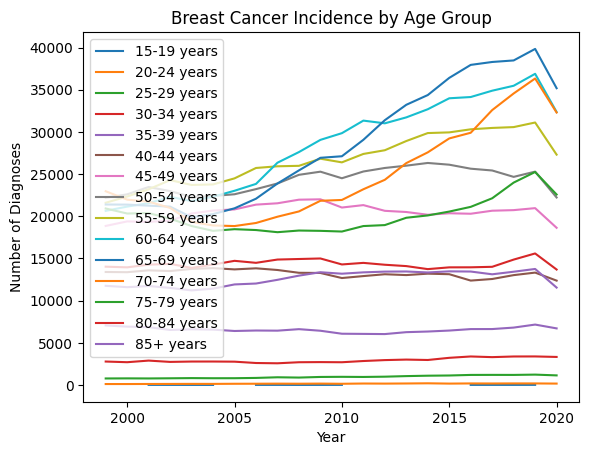

In [32]:
age_pivot = incidence.pivot(index="Year", columns="Age Groups", values="Count")
for column in age_pivot.columns:
    plt.plot(age_pivot.index, age_pivot[column], label=column)

plt.xlabel("Year")
plt.ylabel("Number of Diagnoses")
plt.title("Breast Cancer Incidence by Age Group")

plt.legend()
plt.show()



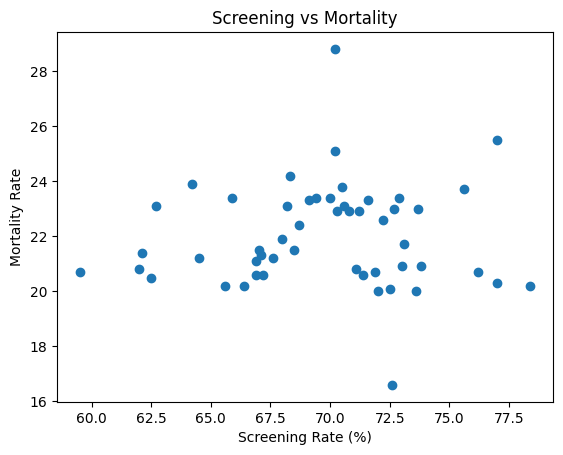

In [26]:
plt.scatter(merged["ScreeningRate"], merged["MortalityRate"])

plt.xlabel("Screening Rate (%)")
plt.ylabel("Mortality Rate")
plt.title("Screening vs Mortality")

plt.show()



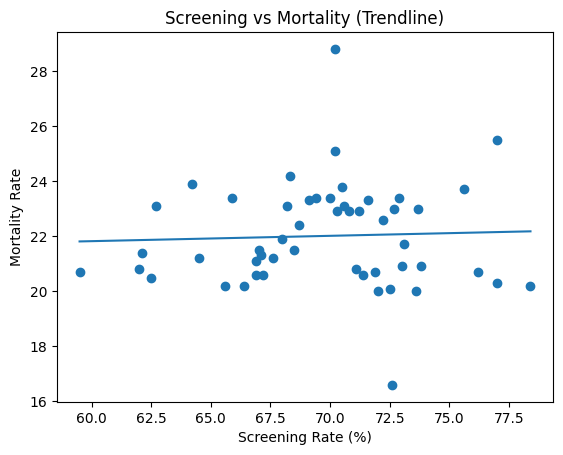

In [29]:
x = merged["ScreeningRate"]
y = merged["MortalityRate"]

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m*x + b)

plt.xlabel("Screening Rate (%)")
plt.ylabel("Mortality Rate")
plt.title("Screening vs Mortality (Trendline)")

plt.show()
